# Predicting Bike Rentals

As the climate crisis gets worse, we should be encouraged to change our habits and look for more sustainable alternatives. One of the most urgent parts of our lives that need a complete overhaul is mobility, especially in urban settings. In recent years, bike sharing has been proven to be a healthy and eco-friendly solution to move within the cities. 

According to the report "Bike Sharing Market - Growth, Trends, COVID-19 Impact, and Forecasts (2021 - 2026)", "the bike-sharing market was valued at USD 3 billion in 2020 and is anticipated to reach USD 4 billion by 2026, at a CAGR of about 6% during the forecast period (2021 - 2026)"

https://www.globenewswire.com/news-release/2021/07/14/2262611/28124/en/Global-Bike-Sharing-Market-2021-to-2026-Growth-Trends-COVID-19-Impact-and-Forecasts.html

In this project, we will use the bike sharing dataset compiled by Hadi Fanaee-T from University of Porto that can be accessed on the UC Irvine website:

http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

The data includes bike rentals in Washington D.C. over a period of time between 2011 and 2012, with each row representing the number of bike rentals for a single hour of a single day. 

Here are the descriptions for the relevant columns:

| Variable | Definition | Key | Notes
| :- | :- | :- | :- |
| instant | A unique sequential ID number for each row | 
| dteday | The date of the rentals | 
| season | The season in which the rentals occurred | 1:winter, 2:spring, 3:summer, 4:fall	
| yr | The year the rentals occurred | 0: 2011, 1:2012 | 
| mnth | The month the rentals occurred | 1 to 12 | 
| hr | The hour the rentals occurred | 0 to 23 | 
| holiday | Whether or not the day was a public holiday | 0: no, 1:yes |
| weekday | The day of the week as a number | 0 to 7 |
| workingday | Whether or not the day was a working day | 0: weekend or holiday, 1: working day |
| weathersit | The weather (as a categorical variable) | 1: Clear, 2: Cloudy/Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow
| temp | Normalized temperature in Celsius | 0 to 1 | t_min=-8, t_max=+39 (only in hourly scale) 
| atemp | Normalized feeling temperature in Celsius | 0 to 1 | t_min=-16, t_max=+50 (only in hourly scale) 
| hum |  Normalized humidity | 0 to 1 | The values are divided to 100 (max) 
| windspeed | Normalized wind speed | 0 to 1 | The values are divided to 67 (max) 
| casual | The number of casual riders | | people who hadn't previously signed up
| registered | The number of registered riders | | people who had already signed up
| cnt | The total number of bike rentals | | casual + registered

Based on the features, we can try to predict the total number of bikes people rented in a given hour. So our target variable will be 'cnt' which is the addition of casual and registered users, meaning those 2 features need to be ignored in the learning algorithms. 

## Data Exploration

In [1]:
import pandas as pd
bike = pd.read_csv('bike_rental_hour.csv')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


As seen, we have 17379 rows with no missing values. Except for the date feature 'dteday', all of the features are numerical which makes it easier to set up the prediction algorithm. The 'dteday' feature is not required for our current study and therefore can be ignored. Next, we can check the distribution of the target variable 'cnt':

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

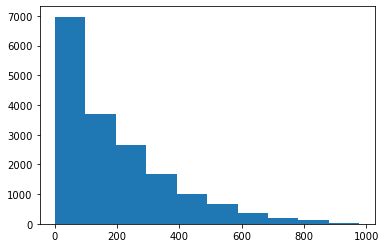

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(bike['cnt'])

As seen, we have a highly right-skewed distribution with most of the days having less than 100 rentals. We can check the correlations between the numerical features: 

In [4]:
corrmat = bike.corr()
sorted_corrs = corrmat['cnt'].abs().sort_values()
print(sorted_corrs)

weekday       0.026900
workingday    0.030284
holiday       0.030927
windspeed     0.093234
mnth          0.120638
weathersit    0.142426
season        0.178056
yr            0.250495
instant       0.278379
hum           0.322911
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


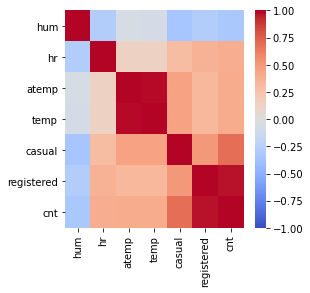

In [5]:
import seaborn as sns
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = bike[strong_corrs.index].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corrmat,
            vmin=-1,
            cmap='coolwarm');

As discussed previously, casual and registered need to be ignored as they are already a part of the total count. The highest correlated features seem to be weather-related which makes sense considering people tend to use bikes more willingly in a warm day with no rain. The one exception seems to be the 'hr' parameter with a correlation of 0.39. However, if we look at the description, we can see that hours range from 0 to 23 and it cannot be regarded as a continuous numerical feature. This is also true for the other time features, which need to be converted to categorical features for further analysis.

## Feature Engineering

We can start with the time of day feature by creating a new column with labels for morning, afternoon, evening, and night. The exact hour for when these periods start and end depend on lifestyle and location. Since the data is from Washington DC, we can assume the average sunrise to be around 6 am and sunset to be around 6 pm. Therefore we can divide the day equally in 6 hours:

In [6]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike['daytime'] = bike['hr'].apply(assign_label)
bike['daytime'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: daytime, dtype: int64

As seen, we have a balanced dataset in terms of the bike rentals per time of day. We can look at the updated dataset to determine which features are suitable for converting to categories. Here are the discrete numerical features as a reminder:

| Variable | Definition | Key |
| :- | :- | :- |
| season | The season in which the rentals occurred | 1:winter, 2:spring, 3:summer, 4:fall	
| yr | The year the rentals occurred | 0: 2011, 1:2012 | 
| mnth | The month the rentals occurred | 1 to 12 | 
| hr | The hour the rentals occurred | 0 to 23 | 
| holiday | Whether or not the day was a public holiday | 0: no, 1:yes |
| weekday | The day of the week as a number | 0 to 7 |
| workingday | Whether or not the day was a working day | 0: weekend or holiday, 1: working day |
| weathersit | The weather (as a categorical variable) | 1: Clear, 2: Cloudy/Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow
| daytime | The part of the day | 1:morning, 2:afternoon, 3:evening, 4:night

As seen, the month is a part of the season and hour is now part of the daytime. Weekday ranges from 0 to 7, but could be summarized as part of the workingday feature as we can differentiate between when people have to go to work or not. We can now convert these columns into categorical features:

In [7]:
import numpy as np
## Categorical features to be used
catcols = ['season', 'workingday', 'weathersit', 'daytime']
## Copy the original dataframe
modbike = bike.copy()
for col in catcols:
## Convert into categorical column
    modbike[col] = bike[col].astype('category')
## Unique values in each categorical column
    uniq = np.unique(modbike[col])
    print('{}: {} unique values -  {}'.format(col,len(uniq),uniq))

season: 4 unique values -  [1 2 3 4]
workingday: 2 unique values -  [0 1]
weathersit: 4 unique values -  [1 2 3 4]
daytime: 4 unique values -  [1 2 3 4]


Now we can create dummy columns and add back to the dataframe:

In [8]:
modbike = pd.concat([modbike, pd.get_dummies(modbike[catcols])], axis=1)
modbike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,daytime_1,daytime_2,daytime_3,daytime_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,1,0,1,0,0,0,0,0,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,1,0,1,0,0,0,0,0,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1,0,1,0,0,0,0,0,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,1,0,1,0,0,0,0,0,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1,0,1,0,0,0,0,0,0,1


We can remove the original features to get the final dataframe for the prediction:

In [9]:
modbike = modbike.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 
                        'holiday', 'weekday', 'workingday', 'weathersit',
                        'casual', 'registered', 'daytime'], axis=1)

The modified dataframe:

In [10]:
modbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          17379 non-null  float64
 1   atemp         17379 non-null  float64
 2   hum           17379 non-null  float64
 3   windspeed     17379 non-null  float64
 4   cnt           17379 non-null  int64  
 5   season_1      17379 non-null  uint8  
 6   season_2      17379 non-null  uint8  
 7   season_3      17379 non-null  uint8  
 8   season_4      17379 non-null  uint8  
 9   workingday_0  17379 non-null  uint8  
 10  workingday_1  17379 non-null  uint8  
 11  weathersit_1  17379 non-null  uint8  
 12  weathersit_2  17379 non-null  uint8  
 13  weathersit_3  17379 non-null  uint8  
 14  weathersit_4  17379 non-null  uint8  
 15  daytime_1     17379 non-null  uint8  
 16  daytime_2     17379 non-null  uint8  
 17  daytime_3     17379 non-null  uint8  
 18  daytime_4     17379 non-nu

## Making Predictions

We can start with linear regression to test our dataset and establish a baseline for the error metric. We can choose the mean squared error metric to evaluate our error since it works on continuous numeric data, like the target variable we are trying to predict.

In [11]:
train = modbike.sample(frac=.8)
test = modbike.loc[~modbike.index.isin(train.index)]

In [12]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove('cnt')

reg = LinearRegression()

reg.fit(train[predictors], train['cnt'])

predictions = reg.predict(test[predictors])

np.mean((predictions - test['cnt']) ** 2)

17652.906429804374

The error is reasonably high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts as observed in the distribution. Larger errors are penalized more with MSE, which leads to a higher total error. We can use a Decision Tree Algorithm to compare with linear regression:

In [13]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train['cnt'])

predictions = reg.predict(test[predictors])

np.mean((predictions - test['cnt']) ** 2)

17669.078589762034

As seen, the accuracy is not improved with the basic decision tree algorithm. Next we can try Random Forest algorithm:

In [14]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train['cnt'])
predictions = reg.predict(test[predictors])
np.mean((predictions - test['cnt']) ** 2)

13583.561384658107

Random forest is an ensemble algorithm that combines the predictions of multiple decision trees to create a more accurate ﬁnal prediction. So as expected, random forest approach removes overfitting to a certain degree and reduces the error. If we plot the actual rentals vs. predictions:

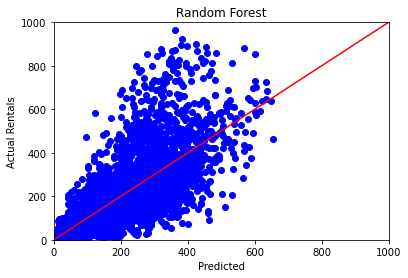

In [15]:
actual_values = test['cnt']
plt.scatter(predictions, actual_values, color='b')
plt.axline((0, 0), slope=1, color='r')
plt.xlabel('Predicted')
plt.ylabel('Actual Rentals')
plt.title('Random Forest')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()

The plot illustrates how large the error is as the predictions deviate from the actual number of rentals. As potential improvement, we could calculate additional features to reduce the error. For example, we are all used to the the apparent temperature reported in our weather apps that combines actual temperature, humidity, and wind speed.

## Calculate Apparent Temperature

The following formula is used to calculate apparent temperature according to https://calculator.academy/apparent-temperature-calculator/

AT = Ta + .348*e – .70*ws+.70*(Q/ws+10) – 4.25

    AT is the apparent temperature (C)
    Ta is the dry bulb temperature (C)
    e is the humidity (hPa)
    ws is the wind speed (m/s)
    Q is the net radiation absorbed per unit of body surface area. 

Since we don't have any information on the radiation, we can replace Q with 0 to eliminate it. To be able to compare with other error values, we will copy the train and test datasets.

In [16]:
train_mod = train.copy()
test_mod = test.copy()

train_mod['app_temp'] = train['atemp'] + (0.348*train['hum'])
- (0.7*train['windspeed']) + 2.75

test_mod['app_temp'] = test['atemp'] + (0.348*test['hum'])
- (0.7*test['windspeed']) + 2.75

predictors = list(train_mod.columns)
predictors.remove('cnt')

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train_mod[predictors], train_mod['cnt'])
predictions = reg.predict(test_mod[predictors])
np.mean((predictions - test_mod['cnt']) ** 2)

13462.813530050082

## Conclusion

For the given dataset with continuous numerical data and multiple nonlinear features, the random forest algorithm turned out to be the most accurate algorithm. 

The additional feature of apparent temperature did not yield a significant increase in accuracy.

The model could do better in predicting casual and registered users instead of the number of rentals. So a potential next step could be to turn this into a classification problem.